In [1]:
import keras
from keras.datasets import fashion_mnist
from keras.models import Sequential
from keras import layers
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from keras.utils import to_categorical
import matplotlib.pyplot as plt
import numpy as np

In [2]:
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [3]:
print(train_images.shape)
print(train_labels.shape)
print(test_images.shape)
print(test_labels.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [4]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

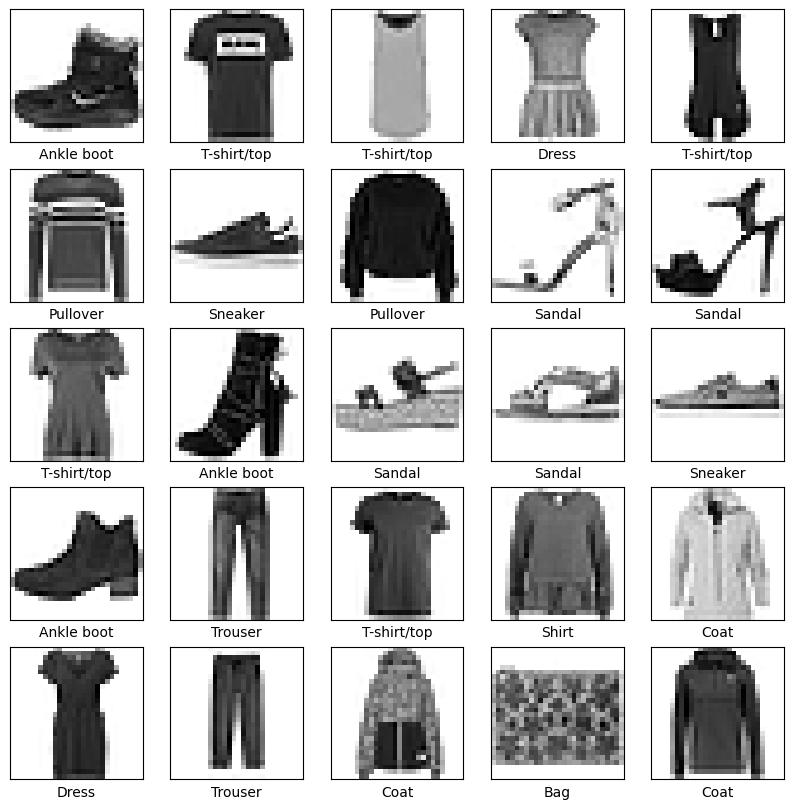

In [5]:
plt.figure(figsize=[10, 10])
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [6]:
train_images = train_images.astype('float32') / 255
test_images = test_images.astype('float32') / 255

In [7]:
train_images = np.expand_dims(train_images, axis=-1)
test_images = np.expand_dims(test_images, axis=-1)

In [8]:
num_classes = 10
train_labels = to_categorical(train_labels, num_classes)
test_labels = to_categorical(test_labels, num_classes)

In [9]:
model = Sequential()

model.add(layers.Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=(28, 28, 1)))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(32, (3, 3), padding='same', activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.Dropout(0.3))

model.add(layers.Conv2D(64, (3, 3), padding='same', activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(64, (3, 3), padding='same', activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.Dropout(0.5))

model.add(layers.Conv2D(128, (3, 3), padding='same', activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(128, (3, 3), padding='same', activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.Dropout(0.5))

model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(num_classes, activation='softmax'))

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 batch_normalization (Batch  (None, 28, 28, 32)        128       
 Normalization)                                                  
                                                                 
 conv2d_1 (Conv2D)           (None, 28, 28, 32)        9248      
                                                                 
 batch_normalization_1 (Bat  (None, 28, 28, 32)        128       
 chNormalization)                                                
                                                                 
 max_pooling2d (MaxPooling2  (None, 14, 14, 32)        0         
 D)                                                              
                                                        

In [11]:
model.compile(
    optimizer="adam",
    loss=keras.losses.categorical_crossentropy,
    metrics=["accuracy"]
)

In [13]:
history = model.fit(train_images, train_labels, batch_size=64, epochs=20, validation_data=(test_images, test_labels))

Epoch 1/20
938/938 [==============================] - 169s 180ms/step - loss: 0.3794 - accuracy: 0.8629 - val_loss: 0.3107 - val_accuracy: 0.8852
Epoch 2/20
938/938 [==============================] - 177s 189ms/step - loss: 0.3256 - accuracy: 0.8833 - val_loss: 0.2736 - val_accuracy: 0.9012
Epoch 3/20
938/938 [==============================] - 177s 189ms/step - loss: 0.2970 - accuracy: 0.8940 - val_loss: 0.2629 - val_accuracy: 0.9052
Epoch 4/20
938/938 [==============================] - 129s 137ms/step - loss: 0.2740 - accuracy: 0.9015 - val_loss: 0.2662 - val_accuracy: 0.9061
Epoch 5/20
938/938 [==============================] - 188s 201ms/step - loss: 0.2630 - accuracy: 0.9061 - val_loss: 0.2428 - val_accuracy: 0.9141
Epoch 6/20
938/938 [==============================] - 186s 198ms/step - loss: 0.2492 - accuracy: 0.9108 - val_loss: 0.2350 - val_accuracy: 0.9168
Epoch 7/20
938/938 [==============================] - 150s 160ms/step - loss: 0.2378 - accuracy: 0.9139 - val_loss: 0.2180 -

In [14]:
test_loss, test_accuracy = model.evaluate(test_images, test_labels, verbose=2)

313/313 - 4s - loss: 0.1890 - accuracy: 0.9346 - 4s/epoch - 12ms/step


In [15]:
print("Test Accuracy:", test_accuracy)

Test Accuracy: 0.9345999956130981


Text(0.5, 1.0, 'Loss Curves')

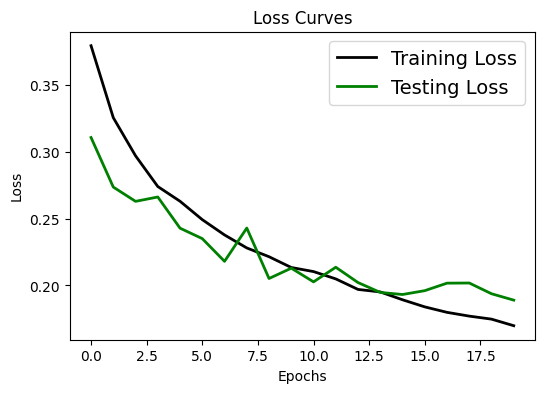

In [16]:
plt.figure(figsize=[6,4])
plt.plot(history.history['loss'], 'black', linewidth=2.0)
plt.plot(history.history['val_loss'], 'green', linewidth=2.0)
plt.legend(['Training Loss', 'Testing Loss'], fontsize=14)
plt.xlabel('Epochs', fontsize=10)
plt.ylabel('Loss', fontsize=10)
plt.title('Loss Curves', fontsize=12)

Text(0.5, 1.0, 'Accuracy Curves')

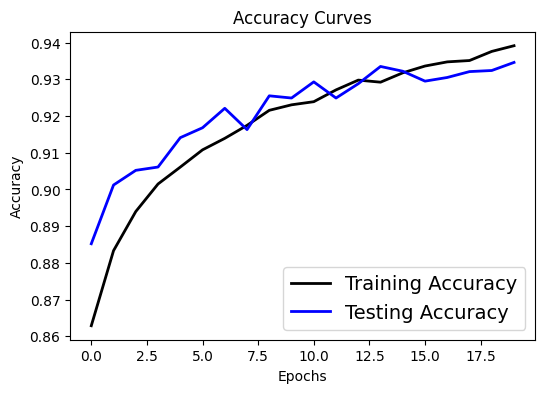

In [17]:
plt.figure(figsize=[6,4])
plt.plot(history.history['accuracy'], 'black', linewidth=2.0)
plt.plot(history.history['val_accuracy'], 'blue', linewidth=2.0)
plt.legend(['Training Accuracy', 'Testing Accuracy'], fontsize=14)
plt.xlabel('Epochs', fontsize=10)
plt.ylabel('Accuracy', fontsize=10)
plt.title('Accuracy Curves', fontsize=12)

In [18]:
pred = model.predict(test_images)
print(pred)

313/313 [==============================] - 5s 16ms/step
[[1.23960486e-08 4.61355754e-09 6.93699453e-09 ... 9.05378110e-05
  1.23038051e-08 9.99907255e-01]
 [5.35055988e-05 1.20943933e-09 9.99870896e-01 ... 8.58207949e-11
  3.88932497e-10 2.02424286e-10]
 [8.19064194e-09 1.00000000e+00 9.23288734e-09 ... 1.93840677e-09
  1.16699894e-09 1.15182663e-09]
 ...
 [1.06899884e-08 5.12877074e-09 3.79214082e-09 ... 1.81443616e-09
  9.99999881e-01 2.01276311e-08]
 [2.36297115e-09 1.00000000e+00 3.50519769e-09 ... 1.13649823e-09
  2.92057906e-10 5.55387181e-10]
 [9.54269490e-06 1.04181117e-06 2.76878723e-06 ... 1.69421881e-02
  2.87062197e-04 2.09042439e-04]]


In [19]:
pred_classes = np.argmax(pred, axis=1)
print(pred_classes)

[9 2 1 ... 8 1 5]


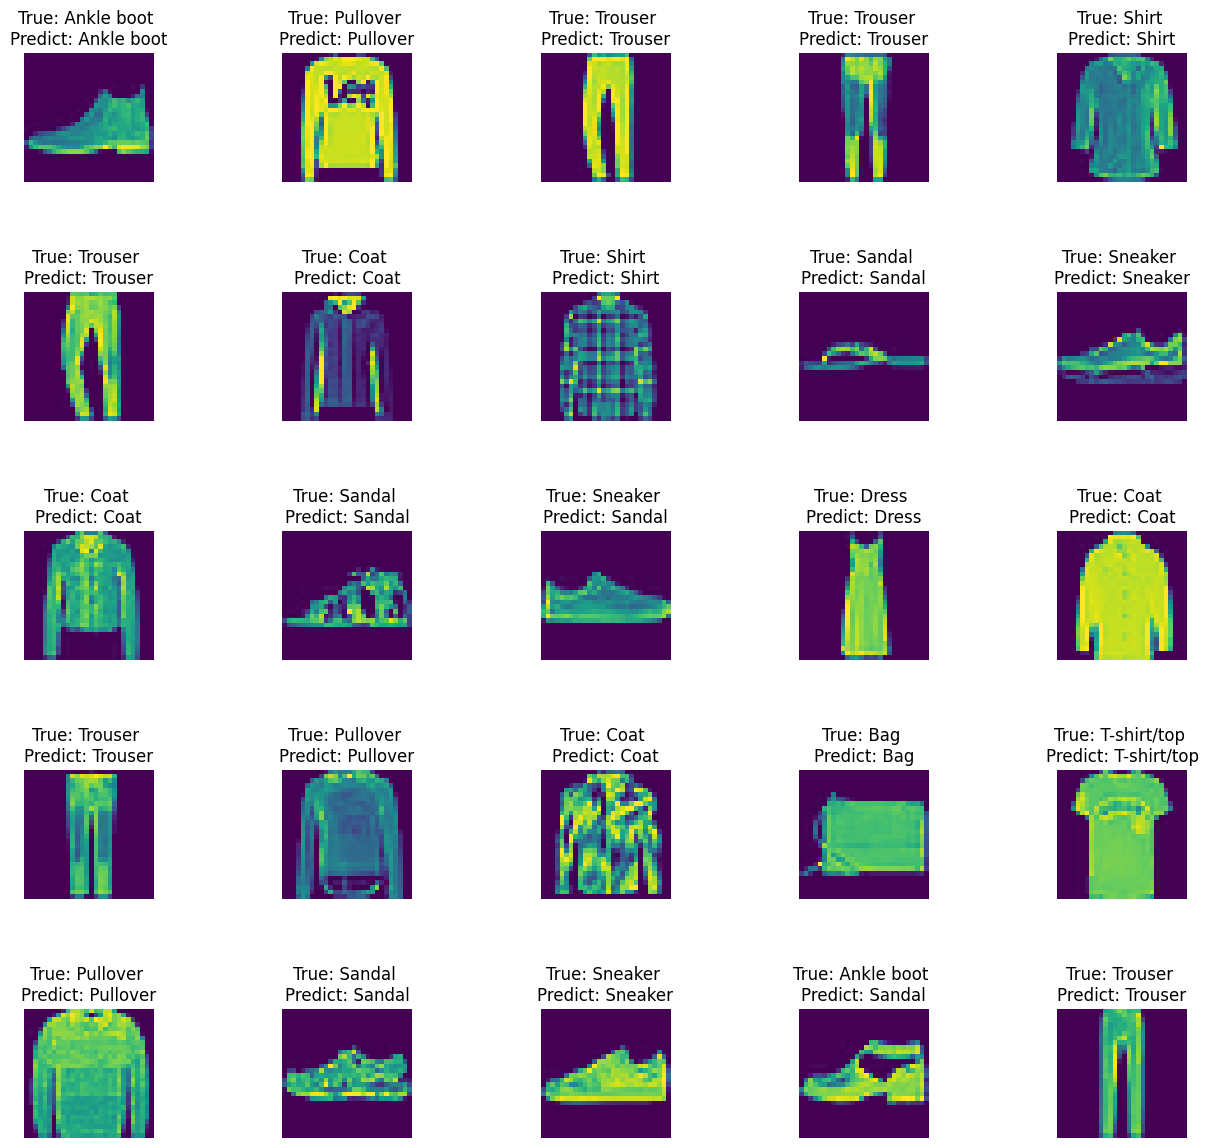

In [20]:
fig, axes = plt.subplots(5, 5, figsize=(15,15))
axes = axes.ravel()
for i in np.arange(0, 25):
    axes[i].imshow(test_images[i])
    axes[i].set_title("True: %s \nPredict: %s" % (class_names[np.argmax(test_labels[i])], class_names[pred_classes[i]]))
    axes[i].axis('off')
    plt.subplots_adjust(wspace=1)

In [ ]:
model_json = model.to_json()
with open('model.json', 'w') as json_file:
    json_file.write(model_json)
model.save_weights('model_weights.h5')